In [1]:
import Integrate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
SunModel = pd.read_csv("solar_model.dat",sep = '\t')

In [3]:
def GetElementDense(m_body_model, element_name,mass):
    el_name_num = (element_name+str(mass))
    if(el_name_num in m_body_model.columns):
        rho_e = m_body_model[el_name_num]
    elif(element_name in m_body_model.columns):
        rho_e = m_body_model[element_name]
    else:
        raise ValueError(f"no such element '{element_name}' in {m_body_model.columns}")
    
    return np.array(rho_e)*(m_body_model['Rho']/mass)

In [4]:
Integrate.Capture(SunModel['Radius'],SunModel['phi'],GetElementDense(SunModel,'H',1),0.73e-3,2e-3,1.8e-3,0.423e-3,100,0,0.938,0,100,10001)

1.2639049291610718

In [12]:
elements = ['H','He','O','Fe']
elementsA = [1,4,16,56]
masses = np.array(elementsA)*0.938

In [16]:
deltas = np.linspace(-2e-4,2e-4,21)

In [17]:
wimp_mass = 10
Capt1 = []
for i in range(len(elements)):
   el = elements[i]
   CaptForDeltas = []
   print(el,", m = ", masses[i], ", ")
   A = elementsA[i]
   b = (4.61*(A)**(1/3.0) + 1.52)*(2.0/3)**0.5
   for delta in deltas:
      CaptForDeltas.append(
         A**4*Integrate.Capture(
            SunModel['Radius'],SunModel['phi'],GetElementDense(SunModel,el,A),
            0.73e-3,2e-3,1.8e-3,0.423e-3,wimp_mass,delta,masses[i],b,100,1001))
   Capt1.append(np.array(CaptForDeltas))

H , m =  0.938 , 
He , m =  3.752 , 
O , m =  15.008 , 
Fe , m =  52.528 , 


([<matplotlib.axis.XTick at 0x2859348bf70>,
 [Text(-0.0002, 0, '-200'),
  Text(-0.0001, 0, '-100'),
  Text(0.0, 0, '0'),
  Text(0.0001, 0, '100'),
  Text(0.0002, 0, '200')])

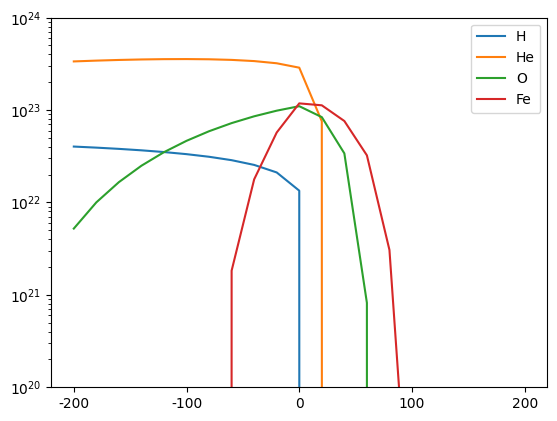

In [18]:
for pl in Capt1:
    plt.plot(deltas,pl*(1/1.985e10)*5.665e32/wimp_mass)

plt.legend(elements)

plt.yscale('log')
plt.ylim(1e20,1e24)
plt.xticks([-2e-4,-1e-4,0,1e-4,2e-4],[-200,-100,0,100,200])